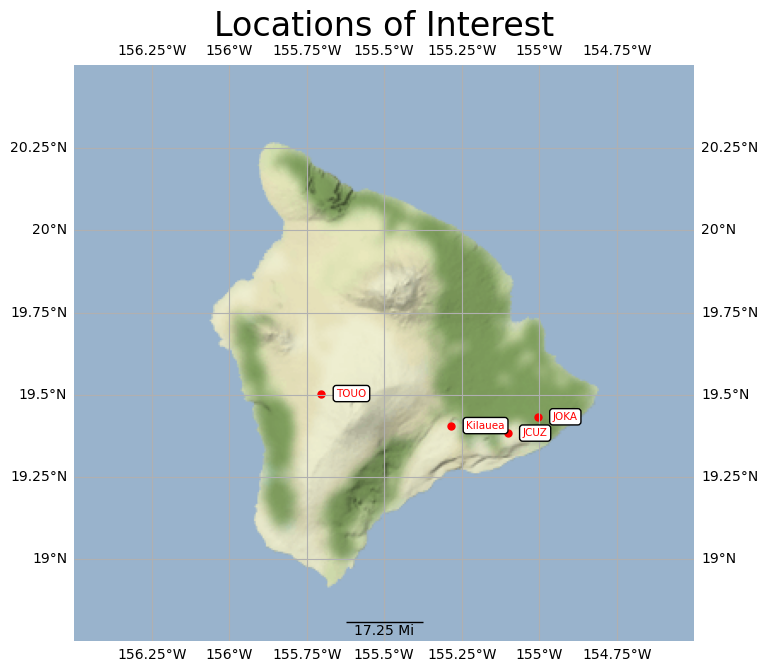

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

import cartopy.io.img_tiles as cimgt
from matplotlib.transforms import offset_copy

# Define the map projection
proj = ccrs.PlateCarree()

# Coordinates for our sites
lat = np.array([19.433613, 19.384045, 19.504323, 19.4069])
long = np.array([-155.004449, -155.101578, -155.702741, -155.2834])

# Map range (longitude, latitude)
extent = [-156.5, -154.5, 18.75, 20.5]

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

# Create a new figure
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(1, 1, 1, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Plot the stations on the map
ax.plot(long, lat, 'ro', markersize=5, transform=proj)
ax.add_image(stamen_terrain, 8)
# Set the extent of the map to focus on the Big Island of Hawaii
ax.set_extent(extent, crs=proj)

# Show gridlines
ax.gridlines(draw_labels=True)



geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=15)


kilauea_lon, kilauea_lat = long[-1], lat[-1]
ax.text(kilauea_lon, kilauea_lat, 'Kilauea', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

JCUZlong, JCUZlat = long[1], lat[1]
ax.text(JCUZlong, JCUZlat, 'JCUZ', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

JOKAlong, JOKAlat = long[0], lat[0]
ax.text(JOKAlong, JOKAlat, 'JOKA', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

TOUOlong, TOUOlat = long[2], lat[2]
ax.text(TOUOlong, TOUOlat, 'TOUO', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)


# Add a title to the map
ax.set_title('Locations of Interest', fontsize=24)


from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

#data = np.random.rand(5, 5)

#img = plt.imshow(data, cmap="YlGnBu")
ab = plt.gca()
scalebar = AnchoredSizeBar(ab.transData, 27750, "17.25 Mi", 'lower center', frameon=False)

ax.add_artist(scalebar)
ax.axis('off')
plt.show()

# Show the map
plt.show()